<a href="https://colab.research.google.com/github/caxaxa/SigmaGeek_Cellular_Automata/blob/main/Sigma_Geek_Cellular_Atutomata_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Celular Automata Maze

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [226]:
#get the second grid from the game
import urllib.request


url = "https://s3.amazonaws.com/appforest_uf/f1678907491882x777874554533324300/input.txt"
response = urllib.request.urlopen(url)
grid0 = np.loadtxt(response, delimiter=" ")



In [227]:
# Define a function to plot a grid


def plot_grid(grid):
    n_rows, n_cols = grid.shape
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.imshow(grid, cmap="Greens", extent=[0, n_cols, 0, n_rows], origin="lower") # set cmap to "Greens"
    ax.set_xticks(range(n_cols+1))
    ax.set_yticks(range(n_rows+1))
    ax.grid(color="gray", linewidth=0.5)
    plt.show()

    return fig,ax
    


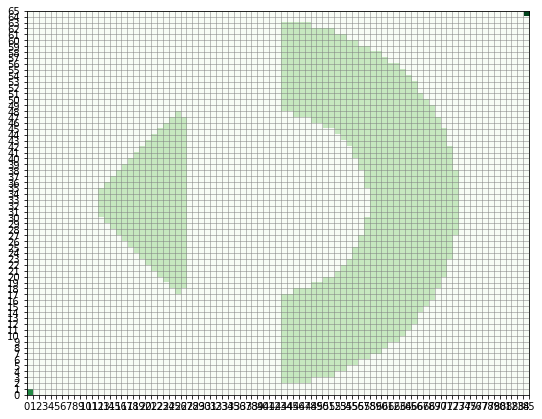

(<Figure size 648x648 with 1 Axes>, <Axes: >)

In [228]:
plot_grid(grid0)

In [229]:
def apply_rule(center, neighbors):
    # Count the number of green neighbors
    green_neighbors = np.count_nonzero(neighbors)
    # Apply the appropriate rule based on the center cell's color and the number of green neighbors
    if center == 0:
        # White cell rule
        if green_neighbors > 1 and green_neighbors < 5:
            return 1  # Turn white cell green
        else:
            return 0  # Keep white cell white
    else:
        # Green cell rule
        if green_neighbors > 3 and green_neighbors < 6:
            return 1  # Keep green cell green
        else:
            return 0  # Turn green cell white
    

def next_generation(grid):
    # Define function to apply the rules to each cell
    # Get the dimensions of the input grid
    n_rows, n_cols = grid.shape
    # Create a new grid of the same dimensions to store the next generation
    new_grid = np.zeros_like(grid)
    # Loop through each cell in the input grid
    for i in range(n_rows):
        for j in range(n_cols):
            # Get the 8 neighbors of the current cell
            neighbors = np.zeros(9, dtype=np.int8)
            for k in range(3):
                for l in range(3):
                    if k == 1 and l == 1:
                        continue  # Skip the center cell
                    row = i + k - 1
                    col = j + l - 1
                    if row < 0 or row >= n_rows or col < 0 or col >= n_cols:
                        # If a neighbor is out of bounds, treat it as a white cell
                        neighbors[k * 3 + l] = 0
                    else:
                        neighbors[k * 3 + l] = grid[row, col]
            # Apply the rules to the current cell and store the result in the new grid
            new_grid[i, j] = apply_rule(grid[i, j], neighbors)
    # Return the new grid representing the next generation
    return new_grid

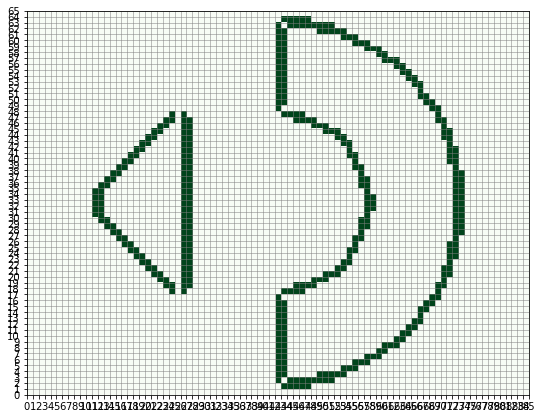

(<Figure size 648x648 with 1 Axes>, <Axes: >)

In [230]:
grid1 = next_generation(grid0)
plot_grid(grid1)

In [231]:
from matplotlib import cm

def plot_grid(grid, ax):
    # Create a color map: 0 as white and 1 as green
    cmap = cm.get_cmap('viridis', 2)
    cmap.set_under('white')
    img = ax.imshow(grid, cmap=cmap, vmin=0.5, vmax=1.5, interpolation='nearest')
    return [img]

def create_animation(grid0, n, update, plot_grid):
    frames = [grid0]

    for i in range(n-1):
        new_frame = update(frames[-1])
        frames.append(new_frame)

    def update_plot(frame_number, frames, ax):
        ax.clear()
        artists = plot_grid(frames[frame_number], ax)
        return artists

    fig, ax = plt.subplots()
    ani = animation.FuncAnimation(fig, update_plot, n, fargs=(frames, ax), interval=200, blit=True)

    plt.show()

    return ani

<ipython-input-231-03382b1b8af5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 2)


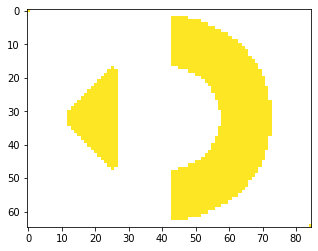

In [232]:
my_animation = create_animation(grid0, 200, next_generation, plot_grid)

In [233]:
my_animation.save('anime.avi')

<ipython-input-231-03382b1b8af5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 2)


In [234]:
my_animation.save('anime2.mp4')

<ipython-input-231-03382b1b8af5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 2)


In [236]:
from typing import List

class Node:
    def __init__(self, position, step, g_score=float('inf'), h_score=float('inf'), parent=None):
        self.position = position
        self.step = step
        self.g_score = g_score
        self.h_score = h_score
        self.f_score = g_score + h_score
        self.parent = parent

    def __eq__(self, other):
        return self.position == other.position and self.step == other.step
    
    def __lt__(self, other):
        return self.f_score < other.f_score or (self.f_score == other.f_score and self.h_score < other.h_score)

    def __hash__(self):
        return hash((self.position, self.step))


def reconstruct_path(node):
    path = [(node.position, node.step)]
    while node.parent is not None:
        node = node.parent
        path.append((node.position, node.step))
    return path[::-1]


def a_star(grids: List[List[int]], start: Node, goal: tuple) -> List[tuple]:
    open_set = [start]
    closed_set = set()

    while open_set:
        current = min(open_set, key=lambda node: node.f_score)
        if current.position == goal:
            return reconstruct_path(current)

        open_set.remove(current)
        closed_set.add(current)

        grid = grids[current.step]
        for dx, dy in ((0, 1), (0, -1), (1, 0), (-1, 0)):
            x, y = current.position[0] + dx, current.position[1] + dy
            if x < 0 or x >= len(grid) or y < 0 or y >= len(grid[0]):
                continue
            if (x, y) in closed_set:
                continue
            if grid[x][y] != 0:
                continue
            tentative_g_score = current.g_score + 1
            successor_step = current.step + 1
            successor = Node(position=(x, y), step=successor_step, g_score=tentative_g_score, h_score=abs(x - goal[0]) + abs(y - goal[1]), parent=current)
            if successor in open_set:
                if tentative_g_score < successor.g_score:
                    successor.g_score = tentative_g_score
                    successor.f_score = successor.g_score + successor.h_score
                    successor.parent = current
            else:
                open_set.append(successor)

    return None


In [237]:
# Define the start and goal nodes
start = Node(position=(0, 0), step=0, g_score=0, h_score=abs(0 - 65) + abs(0 - 85))
goal = (63, 83)

# Run the A* algorithm with a maximum of 5 grids and print the result
path = a_star(grids, start, goal)
print(path)

[((0, 0), 0), ((0, 1), 1), ((0, 2), 2), ((0, 3), 3), ((0, 4), 4), ((0, 5), 5), ((0, 6), 6), ((0, 7), 7), ((0, 8), 8), ((0, 9), 9), ((0, 10), 10), ((0, 11), 11), ((1, 11), 12), ((2, 11), 13), ((3, 11), 14), ((4, 11), 15), ((5, 11), 16), ((6, 11), 17), ((7, 11), 18), ((8, 11), 19), ((9, 11), 20), ((10, 11), 21), ((11, 11), 22), ((12, 11), 23), ((13, 11), 24), ((14, 11), 25), ((14, 12), 26), ((15, 12), 27), ((16, 12), 28), ((17, 12), 29), ((17, 11), 30), ((17, 12), 31), ((18, 12), 32), ((19, 12), 33), ((20, 12), 34), ((20, 13), 35), ((20, 14), 36), ((19, 14), 37), ((18, 14), 38), ((18, 15), 39), ((18, 16), 40), ((19, 16), 41), ((19, 17), 42), ((19, 16), 43), ((19, 17), 44), ((19, 18), 45), ((18, 18), 46), ((18, 19), 47), ((17, 19), 48), ((17, 20), 49), ((17, 21), 50), ((18, 21), 51), ((18, 22), 52), ((18, 21), 53), ((18, 22), 54), ((18, 21), 55), ((18, 22), 56), ((18, 23), 57), ((19, 23), 58), ((18, 23), 59), ((18, 24), 60), ((18, 25), 61), ((18, 26), 62), ((18, 27), 63), ((19, 27), 64), 

In [238]:
first_elements = [t[0] for t in path]
print(first_elements) 

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 11), (2, 11), (3, 11), (4, 11), (5, 11), (6, 11), (7, 11), (8, 11), (9, 11), (10, 11), (11, 11), (12, 11), (13, 11), (14, 11), (14, 12), (15, 12), (16, 12), (17, 12), (17, 11), (17, 12), (18, 12), (19, 12), (20, 12), (20, 13), (20, 14), (19, 14), (18, 14), (18, 15), (18, 16), (19, 16), (19, 17), (19, 16), (19, 17), (19, 18), (18, 18), (18, 19), (17, 19), (17, 20), (17, 21), (18, 21), (18, 22), (18, 21), (18, 22), (18, 21), (18, 22), (18, 23), (19, 23), (18, 23), (18, 24), (18, 25), (18, 26), (18, 27), (19, 27), (19, 28), (20, 28), (20, 29), (20, 28), (19, 28), (19, 27), (19, 26), (20, 26), (19, 26), (20, 26), (21, 26), (20, 26), (21, 26), (22, 26), (22, 27), (22, 28), (23, 28), (23, 29), (24, 29), (24, 30), (24, 31), (25, 31), (25, 30), (25, 31), (26, 31), (25, 31), (25, 32), (25, 33), (25, 34), (26, 34), (27, 34), (28, 34), (28, 35), (29, 35), (29, 36), (28, 36), (28, 37), (27, 37), 

In [239]:
len(path)

233

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def animate_grids(grids, path, filename):
    n_frames = len(grids)

    def plot_frame(frame):
        print(f'frame {frame}: {grids[frame]}')
        plt.imshow(grids[frame] == 0, cmap='binary')  # plot white cells
        plt.imshow(grids[frame] != 0, cmap='Greens')  # plot green cells

        # Set the position and color of the point as before
        pos = path[frame % len(path)]
        value = grids[frame][pos]
        if value == 0:
            color = 'black'
        else:
            color = 'red'
        plt.plot(pos[1], pos[0], 'o', color=color)

        plt.title(f'Frame {frame}')  # add frame number to title


    # Create the animation
    fig = plt.figure()
    ani = animation.FuncAnimation(fig, plot_frame, frames=range(n_frames), interval=500)

    # Set up the video writer and save the animation as a GIF file
    plt.show()
    return ani

    


In [241]:
ani = animate_grids(grids, first_elements, 'teste_2.gif')

<Figure size 432x288 with 0 Axes>

frame 0: [[3. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 4.]]
frame 0: [[3. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 4.]]
frame 1: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
frame 2: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
frame 3: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
frame 4: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
frame 5: [

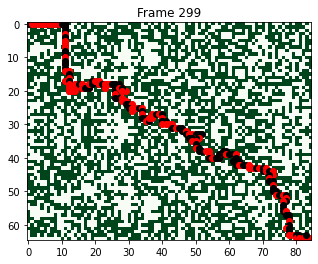

In [242]:
writer = animation.FFMpegWriter(fps=10)
ani.save('animation.avi', writer=writer)

In [ ]:
my_sol.save('my_sol.mp4')

In [171]:
def plot_grid(grid, path, ax):
    # Create a color map: 0 as white, 1 as green, and 2 as yellow
    cmap = colors.ListedColormap(['white', 'green', 'yellow'])
    bounds = [0, 1, 2, 3]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    img = ax.imshow(grid, cmap=cmap, norm=norm, interpolation='nearest')

    # Add a point that follows the given path
    x, y = path[0]
    point_color = 'r' if grid[x][y] == 1 else 'g'
    point = ax.plot(y, x, marker='o', color=point_color)[0]

    def update_point(i):
        x, y = path[i]
        point_color = 'r' if grid[x][y] == 1 else 'g'
        point.set_color(point_color)
        point.set_data(y, x)

    # Return both the image and the point
    return [img, point], update_point

def create_animation(grid0, n, update, plot_grid, path):
    frames = [grid0]

    for i in range(n-1):
        new_frame = update(frames[-1])
        frames.append(new_frame)

    def update_plot(frame_number, frames, ax):
        ax.clear()
        grid = frames[frame_number]
        artists, _ = plot_grid(grid, path, ax)
        path_color = ['g'] * len(path)
        for i, (x, y) in enumerate(path):
            if grid[x][y] == 1:
                path_color[i] = 'r'
        artists[1].set_color(''.join(path_color))
        return artists

    fig, ax = plt.subplots()
    ani = animation.FuncAnimation(fig, update_plot, n, fargs=(frames, ax), interval=200, blit=True)

    plt.show()

    return ani

ValueError: ignored

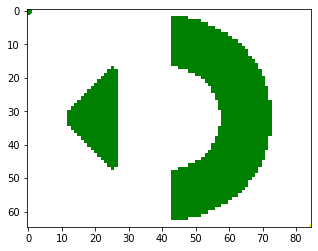

In [172]:
create_animation(grid0, len(first_elements), next_generation, plot_grid, first_elements)

In [175]:
# Create a colormap: 0 is white, 1 is green
cmap = plt.get_cmap('Greens')
cmap.set_under('white')

def animate(frame):
    plt.clf()
    plt.imshow(grids[frame], cmap=cmap, vmin=0.5)
    plt.axis('off')









In [176]:
fig = plt.figure()
plt.show()
ani = animation.FuncAnimation(fig, animate, frames=len(grids), interval=1000, repeat=True)



<Figure size 432x288 with 0 Axes>

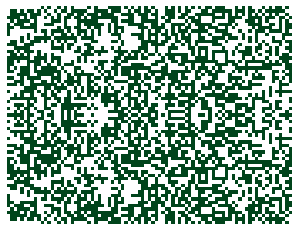

In [177]:
ani.save('test.mp4')

KeyboardInterrupt: ignored

In [ ]:
def solve_maze(grid0, update):
    # Get the dimensions of the grid
    n, m = grid0.shape

    # Initialize the grid with the given initial configuration
    grid = grid0.copy()

    # Set the starting position to (0, 0)
    x, y = 0, 0

    # Set the goal position to (n-1, m-1)
    goal_x, goal_y = n-1, m-1

    # Create an empty path for the player
    path = []

    # Create a figure to display the maze
    fig, ax = plt.subplots()

    # Define a function to update the plot
    def plot_grid(grid, ax):
        # Create a color map: 0 as white , 1 as green, and 2 as green
        cmap = plt.cm.get_cmap('Greens', 3)
        cmap.set_under('white')
        img = ax.imshow(grid, cmap=cmap, vmin=0.5, vmax=2.5, interpolation='nearest')
        # Highlight the current player position in red
        ax.scatter(y, x, color='red', s=50)
        return [img]

    # Create the animation
    ani = create_animation(grid, n*m, update, plot_grid)

    # Define a function to update the player position and return the path
    def update_player(event):
        nonlocal x, y

        # Get the current player position
        current = grid[x, y]

        # Move the player based on the arrow keys
        if event.key == 'right' and y < m-1 and grid[x, y+1] != 1:
            y += 1
            direction = 'right'
        elif event.key == 'left' and y > 0 and grid[x, y-1] != 1:
            y -= 1
            direction = 'left'
        elif event.key == 'up' and x > 0 and grid[x-1, y] != 1:
            x -= 1
            direction = 'up'
        elif event.key == 'down' and x < n-1 and grid[x+1, y] != 1:
            x += 1
            direction = 'down'
        else:
            direction = ''

        # If the player lands on a 1, game over
        if grid[x, y] == 1:
            print("Game over!")
            plt.close(fig)
            return

        # If the player reaches the goal, game won
        if x == goal_x and y == goal_y:
            print("You win!")
            plt.close(fig)
            return

        # Update the player position in the grid
        grid[current] = 0
        grid[x, y] = 2

        # Update the plot
        ax.clear()
        plot_grid(grid, ax)

        # Redraw the plot
        fig.canvas.draw()

        # Append the current direction to the path
        path.append(direction)

        # Print the current player position and path
        print("Current position: ", x, y)
        print("Path: ", path)

    # Attach the key press event handler to the plot
    fig.canvas.mpl_connect('key_press_event', update_player)

    # Show the plot and start the animation
    plt.show()

    # Return the path as a list of strings
    return path , ani

<ipython-input-16-c474f04fd7e8>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens', 3)


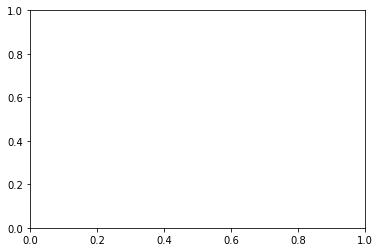

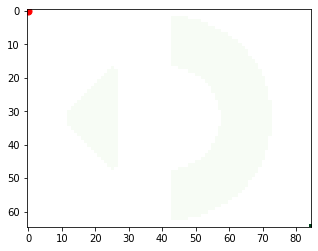

In [ ]:
path , ani = solve_maze(grid0, next_generation)

In [ ]:
path

[]

In [ ]:
ani.save('Trial_2.mp4')

<ipython-input-16-c474f04fd7e8>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens', 3)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install qrcode

import qrcode

# Define the URL to encode in the QR code
url = "whatever"

# Create a QR code instance
qr = qrcode.QRCode(version=1, box_size=10, border=4)

# Add the URL to the QR code
qr.add_data(url)

# Compile the QR code
qr.make(fit=True)

# Generate an image of the QR code
img = qr.make_image(fill_color="black", back_color="white")

# Save the image as a PNG file
img.save("qrcode.pdf")



